# 데이터프레임

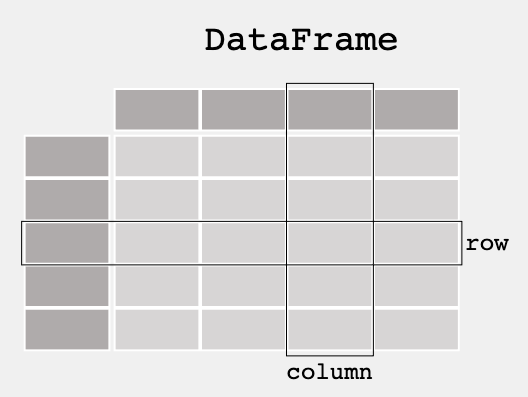


- Pandas 라이브러리에서 기본적으로 데이터를 다루는 단위는 DataFrame : spreadsheet와 같은 개념

- 이러한 형태의 데이터는 Structured Data 또는 Panel Data 또는 Tabular Data라고 부름

- pandas를 공부한다는 것은 결국 dataframe의 사용법을 익히고 활용하는 방법을 배운다는 것과 같더

- pandas를 잘 활용하면 대부분의 structured data를 자유자재로 다룰 수 있게 됨

### 데이터 프레임
- 2차원 행렬 데이터에 인덱스를 붙인 것
- 행과 열로 만들어지는 2차원 배열 구조
- R의 데이터 프레임 에서 유래
- 데이프레임의 각 열은 시리즈로 구성되어 있음
- DataFrame()함수를 사용해서 생성

### 외부파일을 데이터 프레임으로 변환 -> 데이터프레임을 외부파일로 변환
- read_* 함수 사용 ex. csv를 데이터프레임으로 변환해서 가져오기 pd.read_csv('파일명')
- to_* 함수사용 ex. 데이터 프레임을 csv 파일로 내보내기 데이터프레임.to_csv('파일명')


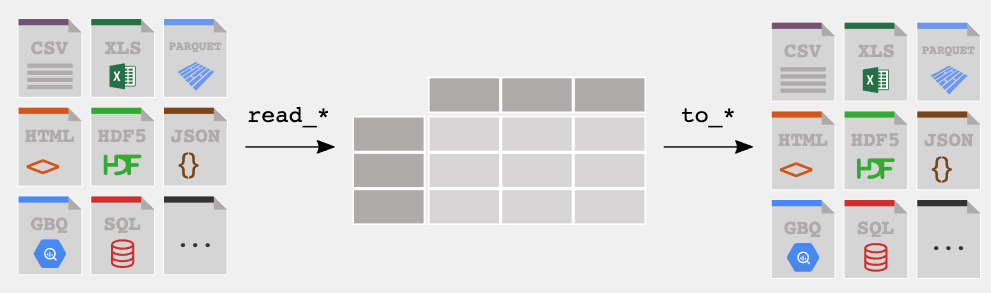

## 데이터 프레임 생성

#### 리스트로 데이터 프레임 만들기

- DataFrame([[list1],[list2]]) - 리스트 안에 리스트 형태로 인수를 전달(2차원 리스트형태로 전달)
- 각 list는 한 행으로 구성됨
- 행의 원소 개수가 다르면 None 값으로 저장
- index 인수값이 없으면 기본 인덱스 (위치인덱스)가 생성됨

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame([['a','b','c'],['a','a','g'],['a','a']])
df

,0,1,2
0,a,b,c
1,a,a,g
2,a,a,None


#### 딕셔너리로 데이터프레임 생성
 - dict의 key -> column name

In [6]:
# 열 데이터를 dict로 작성하는 것이 일반적 임
# 열방향 인덱스(dict의 key), 행방향 인덱스(자동생성 숫자)
df1 = pd.DataFrame({
    'A':[90,80,70],
    'B':[85,98,75],
    'C':[88,99,77],                   
    'D':[87,89,86]
},index = [1,2,3] # 행 인덱스
)
df1
# 딕셔너리의 key는 컬럼네임, index = 인수는 로우네임

,A,B,C,D
1,90,85,88,87
2,80,98,99,89
3,70,75,77,86


In [7]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2000002],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율":[0.0283, 0.0163, 0.0982,0.0141]
}

df3 = pd.DataFrame(data)
df3

,2015,2010,2005,2000,지역,2010-2015 증가율
0,9904312,9631482,9762546,9853972,수도권,0.0283
1,3448737,3393191,3512547,3655437,경상권,0.0163
2,2890451,2632035,2517680,2466338,수도권,0.0982
3,2466052,2000002,2456016,2473990,경상권,0.0141


#### 위에서 생성된 데이터 프레임은 열의 순서가 보장되지 않고, 각 행의 의미 전달이 어렵다
- index 파라미터와 columns 파라미터를 사용해서 df의 의미 전달이 쉬워진다

In [8]:
columns = ['지역','2000','2005','2010','2015', '2010-2015 증가율']
index = ['서울','부산','인천','대구']
df3 = pd.DataFrame(data,index=index, columns=columns)
df3

,지역,2000,2005,2010,2015,2010-2015 증가율
서울,수도권,9853972,9762546,9631482,9904312,0.0283
부산,경상권,3655437,3512547,3393191,3448737,0.0163
인천,수도권,2466338,2517680,2632035,2890451,0.0982
대구,경상권,2473990,2456016,2000002,2466052,0.0141


#### 시리즈로 데이터 프레임 생성
 - 각 Series의 인덱스 -> columnname

In [9]:
a = pd.Series([100, 200, 300], ['a', 'b', 'd'])
b = pd.Series([101, 201, 301], ['a', 'b', 'k'])
c = pd.Series([110, 210, 310], ['a', 'b', 'c'])

In [10]:
pd.DataFrame([a,b,c],index=[100,101,102])

,a,b,d,k,c
100,100.0,200.0,300.0,NaN,NaN
101,101.0,201.0,NaN,301.0,NaN
102,110.0,210.0,NaN,NaN,310.0


#### csv 데이터로 부터 Dataframe 생성
 - 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
 - 데이터 소스로부터 추출된 csv(comma separated values) 파일로부터 생성
 - pandas.read_csv 함수 사용

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### read_csv 함수 파라미터
 - sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정 
 - header - header를 무시할 경우, None 설정
 - index_col - index로 사용할 column 설정
 - usecols - 실제로 dataframe에 로딩할 columns만 설정

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


In [10]:
train_data.columns

Index(['Survived', 'Pclass', 'Name'], dtype='object')

##### 인덱스와 컬럼의 이해

1. 인덱스(index)
 - index 속성
 - 각 아이템을 특정할 수 있는 고유의 값을 저장
 - 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능
 
 
2. 컬럼(column)
 - columns 속성
 - 각각의 특성(feature)을 나타냄
 - 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

Index(['서울', '부산', '인천', '대구'], dtype='object')

#### 행/열 인덱스 이름 설정
- index.name 
- columns.name

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2000002, 2456016, 2473990, 0.0141]], dtype=object)

#### dataframe 데이터 파악하기
 - shape 속성 (row, column)
 - describe 함수 - 숫자형 데이터의 통계치 계산
 - info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서울 to 대구
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             4 non-null      object 
 1   2015           4 non-null      int64  
 2   2010           4 non-null      int64  
 3   2005           4 non-null      int64  
 4   2000           4 non-null      int64  
 5   2010-2015 증가율  4 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 224.0+ bytes


특성,2015,2010,2005,2000,2010-2015 증가율
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000
mean,4.677388e+06,4.414178e+06,4.562197e+06,4.612434e+06,0.039225
std,3.507776e+06,3.524531e+06,3.500545e+06,3.538749e+06,0.039809
min,2.466052e+06,2.000002e+06,2.456016e+06,2.466338e+06,0.014100
25%,2.784351e+06,2.474027e+06,2.502264e+06,2.472077e+06,0.015750
50%,3.169594e+06,3.012613e+06,3.015114e+06,3.064714e+06,0.022300
75%,5.062631e+06,4.952764e+06,5.075047e+06,5.205071e+06,0.045775
max,9.904312e+06,9.631482e+06,9.762546e+06,9.853972e+06,0.098200


(4, 6)

##### 데이터 프레임 전치
- 판다스 데이터 프레임은 전치를 포함해서 Numpy 2차원 배열의 대부분 속성이나 메서드를 지원함.

- 전치 : 행과 열을 바꾸는 기능

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2000002
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


### 데이터 프레임 내용 변경 : 
- 열추가, 열삭제, 내용 갱신

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


### 해당열이 있으면 내용 갱신, 열이 없으면 추가
- 열추가 : df[열이름(key)]=values
- 열 내용 갱신 : df[열이름(key)]=values

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2000002,2456016,2473990,1.41


특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2015 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,1.45
부산,경상권,3448737,3393191,3512547,3655437,1.63,-1.82
인천,수도권,2890451,2632035,2517680,2466338,9.82,14.81
대구,경상권,2466052,2000002,2456016,2473990,1.41,0.41


특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45
부산,경상권,3448737,3393191,3512547,3655437,-1.82
인천,수도권,2890451,2632035,2517680,2466338,14.81
대구,경상권,2466052,2000002,2456016,2473990,0.41


### 데이터 프레임 인덱싱
1. 열인덱싱
2. 인덱서를 사용하지않는 행 인덱싱
- []기호를 이용해서 인덱싱할때 주의점 : []기호는 열 위주 인덱싱이 원칙

### 1. 열인덱싱
1.열 라벨(컬럼명)을 키값으로 생각하고 인덱싱한다.
- 인덱스로 라벨값을 하나 넣으면 시리즈 객체가 반환
- 라벨의 배열이나 리스트를 넣으면 부분적 df 가 반환

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

pandas.core.series.Series

특성,지역
도시,
서울,수도권
부산,경상권
인천,수도권
대구,경상권


pandas.core.frame.DataFrame

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2000002,2466052


### 판다스 데이터 프레임에 열이름(컬럼명)이 문자열일 경우에는
- 수치 인덱스를 사용할 수 없음
- 위치 인덱싱 기능을 사용할 수 없다. : keyerror 발생

<class 'KeyError'>


- 위치 인덱싱처럼 보이는 예제

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


,1,2
0,1,2
1,5,6
2,9,10


### 행 단위 인덱싱
- 행단위 인덱싱을 하고자 하면 인덱서라는 특수 기능을 사용하지 않는 경우 슬라이싱을 해야 함(인덱서는 바로 뒤에 배움)
- 인덱스 값이 문자(라벨)면 문자슬라이싱도 가능하다.

특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45
부산,경상권,3448737,3393191,3512547,3655437,-1.82
인천,수도권,2890451,2632035,2517680,2466338,14.81
대구,경상권,2466052,2000002,2456016,2473990,0.41


특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45


특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45


특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-1.82
인천,수도권,2890451,2632035,2517680,2466338,14.81


특성,지역,2015,2010,2005,2000,2005-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45
부산,경상권,3448737,3393191,3512547,3655437,-1.82


- 개별요소 접근 [열][행]

9904312

numpy.int64